<a href="https://colab.research.google.com/github/MariaNatiele/Estudando_DataScience/blob/main/Tratamento_Dados_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tratamento Dados no Python

In [60]:
import pandas as pd
import seaborn as sns
import statistics as stc

In [61]:
dados = pd.read_csv("Churn.csv", sep=";")
dados.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [62]:
dados.shape

(999, 12)

In [63]:
#colocando nomes nas colunas
dados.columns = [ "Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito", "Ativo","Salario", "Saiu"]
dados.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


#Explorar os dados
por meio de gráficos estatisticos

In [64]:
#explorar dados categorico
agrupando = dados.groupby(["Estado"]).size()
agrupando

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

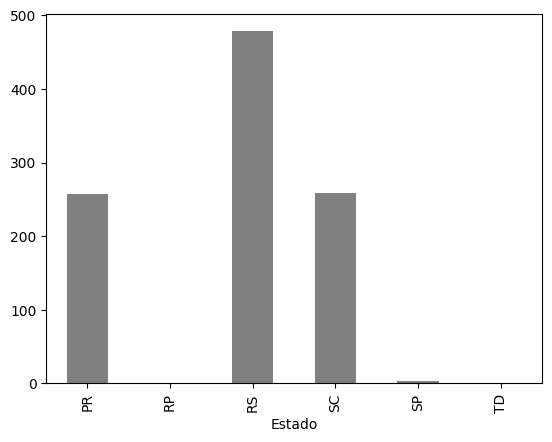

In [65]:
agrupando.plot.bar(color ="gray")

In [66]:
#variavel categorica genero
agrupaG = dados.groupby(["Genero"]).size()
agrupaG

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

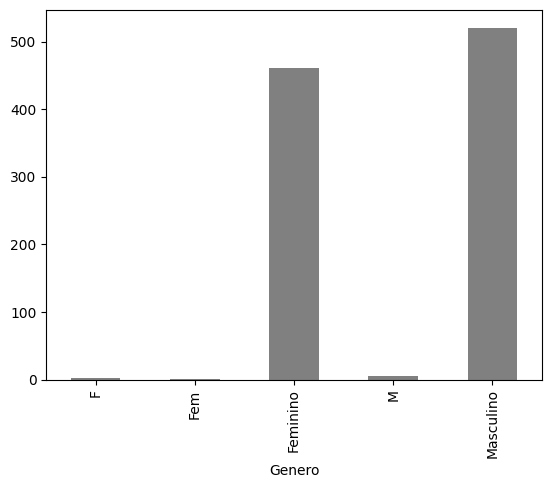

In [67]:
agrupaG.plot.bar(color="gray")

In [68]:
#explorando colunas númericas
dados["Score"].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

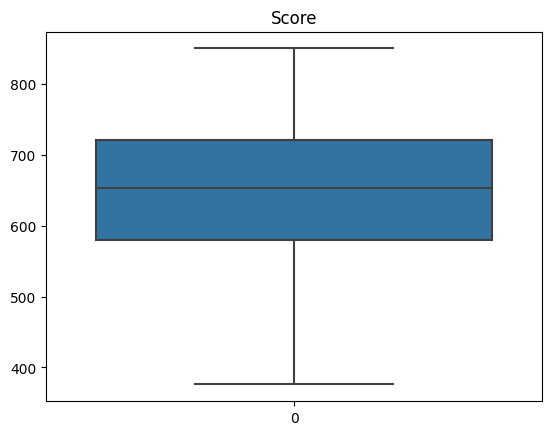

In [69]:
sns.boxplot(dados["Score"]).set_title("Score") 

<ipython-input-70-7a77acd8b399>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados["Score"]).set_title("Score");


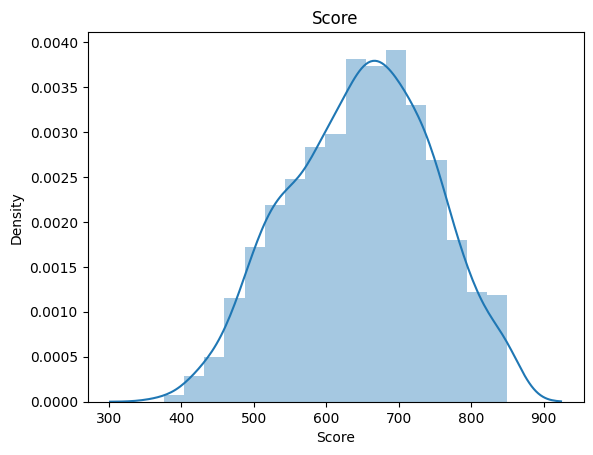

In [70]:
sns.distplot(dados["Score"]).set_title("Score");

In [71]:
dados["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

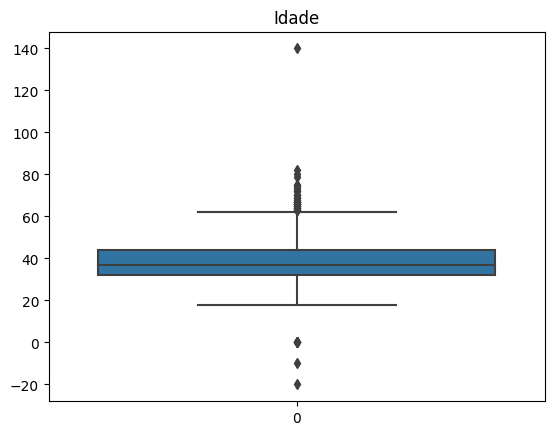

In [72]:
sns.boxplot(dados["Idade"]).set_title("Idade")

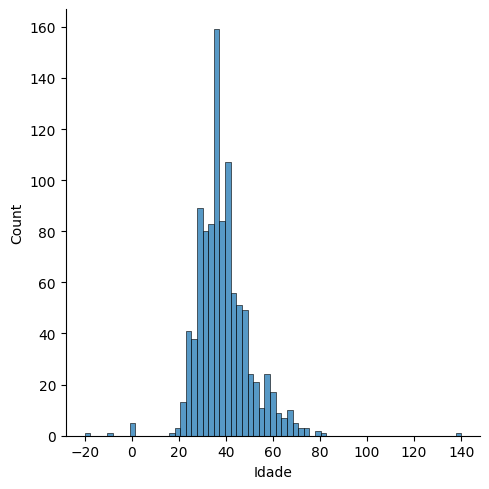

In [73]:
sns.displot(dados["Idade"])

In [74]:
dados["Saldo"].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

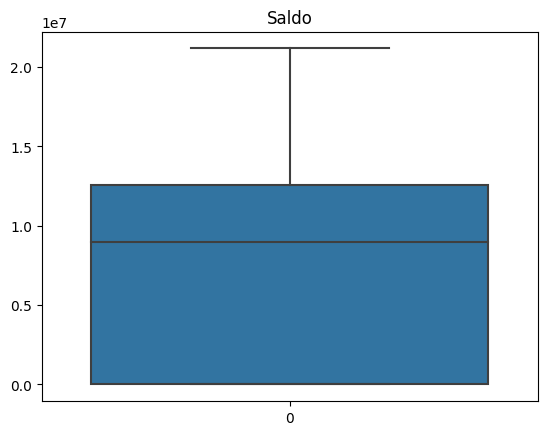

In [75]:
sns.boxplot(dados["Saldo"]).set_title("Saldo")

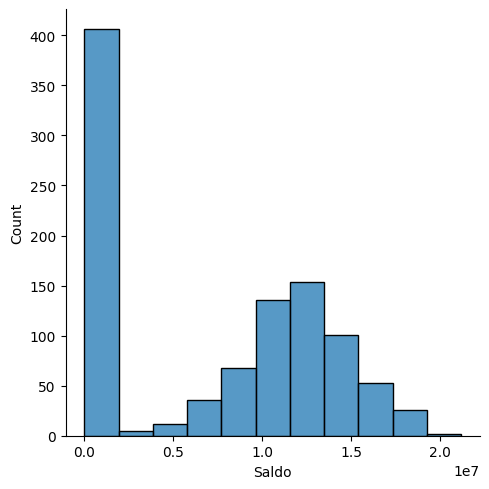

In [76]:
sns.displot(dados["Saldo"])
#muita gente com saldo zero

In [77]:
dados["Salario"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

<Axes: >

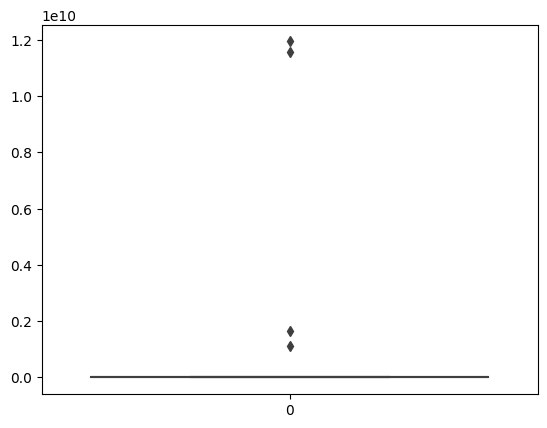

In [78]:
sns.boxplot(dados["Salario"])
#espaço em branco podem ser erros

<ipython-input-79-bad556a6cc4c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados["Salario"])


<Axes: xlabel='Salario', ylabel='Density'>

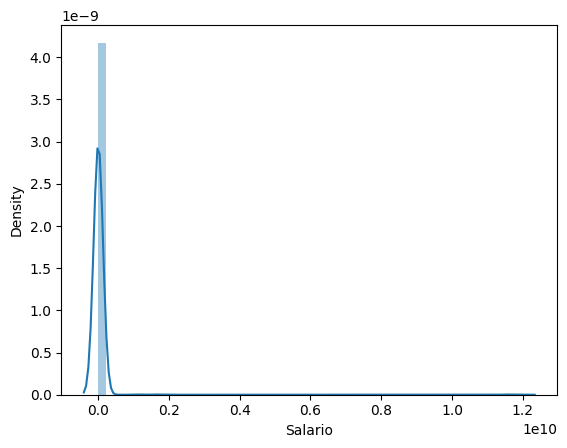

In [79]:
sns.distplot(dados["Salario"])

In [80]:
#olhando se tem valores NA
#some os valores nullos. vamos tratar os valores não nulos. genero e salario
dados.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

Problema Salario tem 7 NAs e genero 8 




In [81]:
#descrição dos dados
dados["Salario"].describe()


count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [82]:
#calcular a mediana para corrigir os dados
mediana = stc.median(dados["Salario"])
mediana

70518.0

In [83]:
#fillna = preencha valores não disponiveis. inplace=True alterar o próprio conjunto de dados.

dados["Salario"].fillna(mediana, inplace=True)

In [84]:
#verificando se existe valores NAs 
dados["Salario"].isnull().sum()

0

Tratando Genero, Problemas 8 NAs e padronização dos genero

In [85]:
agrupando = dados.groupby(["Genero"]).size()
agrupando

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [86]:
#Olhando o campo Genero com 8 NAs e falta de padrão
dados["Genero"].isnull().sum()

8

In [87]:
#Preencher os dados faltantes com Masculino pois é o que mas ocorre. inplace=True -> substituir na própria variavel.
dados["Genero"].fillna("Masculino",  inplace=True)

In [88]:
#verificando novamente os campos nullos
dados["Genero"].isnull().sum()

0

In [89]:
#Padronizando os nomes de Genero
dados.loc[dados["Genero"] == "M" , "Genero"]="Masculino"
dados.loc[dados["Genero"].isin(["F","Fem"]) , "Genero"]="Feminino"

#agrupa novamente
agrupando = dados.groupby(["Genero"]).size()
agrupando



Genero
Feminino     464
Masculino    535
dtype: int64

In [90]:
#idades fora do dominio
dados["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [91]:
#ver o tamanho do problema, olhando o intervalo. Tem os -10, -20 e 140
dados.loc[(dados["Idade"] < 0 )|(dados["Idade"] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [92]:
#calcular a mediana
mediana = stc.median(dados["Idade"])
mediana

37

In [93]:
dados.loc[(dados["Idade"] < 0 )|(dados["Idade"] > 120), "Idade"] = mediana

In [94]:
#verificar se ainda existe dados fora do padrão
dados.loc[(dados["Idade"] < 0 )|(dados["Idade"] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [95]:
#Buscando dados duplicados
dados[dados.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [96]:
#Excluindo pelo ID
dados.drop_duplicates(subset="Id",keep="first", inplace=True)

#Bruscando duplicados
dados[dados.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [97]:
#Estado fora do domínio
agrupando = dados.groupby(["Estado"]).size()
agrupando

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [98]:
#subistituir pela Moda -> RS
dados.loc[dados["Estado"].isin(["RP","SP","TD"]), "Estado"] = "RS"
agrupando = dados.groupby(["Estado"]).size()
agrupando 

Estado
PR    257
RS    483
SC    258
dtype: int64

In [100]:
#salario acima da média, usa-se desvio padrão
desvio = stc.stdev(dados["Salario"])
desvio


528988918.4679201

In [102]:
#define padão com 2*desvio, Checar se algum atende ao critério
dados.loc[dados["Salario"] >= 2*desvio]


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [103]:
#devemos atualizar o salario pela mediana
mediana = stc.median(dados["Salario"])
mediana

8637195.5

In [105]:
dados.loc[dados["Salario"] >= 2*desvio, "Salario"] = mediana

#checar novamente

dados.loc[dados["Salario"] >= 2*desvio]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [106]:
dados.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [108]:
dados.shape

(998, 12)